In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [35]:
img = cv2.imread('aux_cam.jpg')

def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

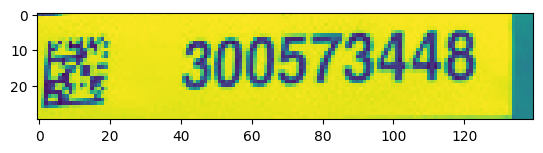

In [36]:
crop = cv2.rotate(img_gray, cv2.ROTATE_90_COUNTERCLOCKWISE)
crop = crop[230:260, 120:260]
plt.imshow(crop)

130.0


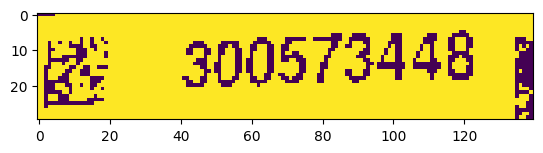

In [21]:
ret, thresh = cv2.threshold(crop, 130, 255, cv2.THRESH_BINARY)
print(ret)
plt.imshow(thresh)

In [25]:
import pytesseract

tess_config = '--psm 7 --oem 3 -c tessedit_char_whitelist=0123456789'
output = pytesseract.image_to_boxes(
        thresh, lang='osd', config=tess_config)
boxes = output.strip().split('\n') if output.strip() else []
h, w = thresh.shape

['5 0 3 20 30 0', '3 41 9 49 22 0', '0 50 9 58 22 0', '0 59 9 67 23 0', '5 68 10 76 23 0', '7 78 10 86 24 0', '3 87 10 95 24 0', '4 96 11 104 24 0', '4 106 11 114 24 0', '8 116 11 123 25 0', '5 135 0 140 23 0']


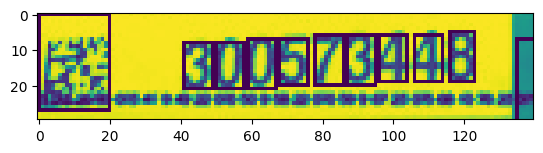

In [34]:

print(boxes)

out = crop.copy()
for b in boxes:
    b = b.split(' ')
    output += b[0]
    out = cv2.rectangle(out,
                        (int(b[1]), h - int(b[2])),
                        (int(b[3]), h - int(b[4])),
                        (0, 255, 0), 1)
out = cv2.putText(out, output, (0, 25), cv2.FONT_HERSHEY_SIMPLEX,
                    0.1, (0, 0, 0), 1, cv2.LINE_AA)
plt.imshow(out)